<a href="https://colab.research.google.com/github/calveng1/techchallenge-fiap-fase1/blob/main/TechChallenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tech Challenge Pós-Tech IA para Devs
Esse trabalho tem como objetivo demonstrar as habilidades de machine learning de aprendizado supervisionado em um case prático real.
O Dataset escolhido foi [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data) e o objetivo é treinar um classificador para identificar a existencia ou não de diabetes dadas as variáveis disponíveis.

Os modelos escolhidos foram Regressão Logistica, RandomForest, XGBoost, KNN e SVC.

As métricas de avaliação de performance dos modelos aplicadas foram Matriz de Confusão, Acurácia, Curva ROC e AUC, Precisão, Recall e F1-score.

Etapas:
1. Definição do problema
2. Exploração de dados
3. Pré-processamento de dados
4. Modelagem
5. Treinamento do modelo
6. Avaliação do modelo

Membros do grupo: Prof. Dr. Amilton Martins, Calven Martins, Diego Tavares e Romero Costa

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)

# 1. Exploração de dados e 2. Pré-processamento de dados

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Para uma primeira observação do Dataset, mostramos os 5 primeiros registros com a function .head() do pandas. Aqui podemos observar que a coluna "Outcome" é um booleano (1 ou 0) e é a nossa coluna Target.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Da mesma forma, usamos a function .info() para observarmos o objeto instanciado do DataFrame. Conseguimos observar que existem 768 registros, todos não-nulos e de tipagem numérica, seja int ou float.

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Explicação de cada coluna

| Estatística | Significado                   | Explicação                                                     |
| ----------- | ----------------------------- | -------------------------------------------------------------- |
| **count**   | Contagem de valores não nulos | Mostra quantos valores válidos existem na coluna.              |
| **mean**    | Média                         | Soma dos valores dividida pela contagem.                       |
| **std**     | Desvio padrão                 | Mede a dispersão: quanto os valores variam em relação à média. |
| **min**     | Valor mínimo                  | O menor valor da coluna.                                       |
| **25%**     | Primeiro quartil (Q1)         | 25% dos valores estão abaixo desse número.                     |
| **50%**     | Mediana (Q2)                  | 50% dos valores estão abaixo desse número.                     |
| **75%**     | Terceiro quartil (Q3)         | 75% dos valores estão abaixo desse número.                     |
| **max**     | Valor máximo                  | O maior valor da coluna.                                       |


É possivel observar que as colunas "Glucose, BloodPressure, SkinThickness, Insulin e BMI" possuem valores zerados, que precisarão ser limpos.


In [ ]:
print(f'Quantidade de registros inicialmente: {len(df)}')

Quantidade de registros inicialmente: 768


In [ ]:
df = df[(df['Glucose'] > 0) &
        (df['BloodPressure'] > 0) &
        (df['SkinThickness'] > 0) &
        (df['Insulin'] > 0) &
        (df['BMI'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [ ]:
print(f'Quantidade de registros após a limpeza: {len(df)}')

Quantidade de registros após a limpeza: 392


Como abordagem de limpeza, escolhemos remover os registros, pois acreditamos que as outras alternativas, como por exemplo utilizar um valor de mediana de todos os registros ou substituir os valores zerados por "NaN" acabam criando valores falsos, o que acreditamos que afetaria negativamente o aprendizado do modelo.

Infelizmente essa abordagem removeu uma boa quantidade de registros, mas ao nosso ver ela se mantém mais fiel a um cenário real.

In [ ]:
# Dados após limpeza
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
BloodPressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
SkinThickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
DiabetesPedigreeFunction,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00


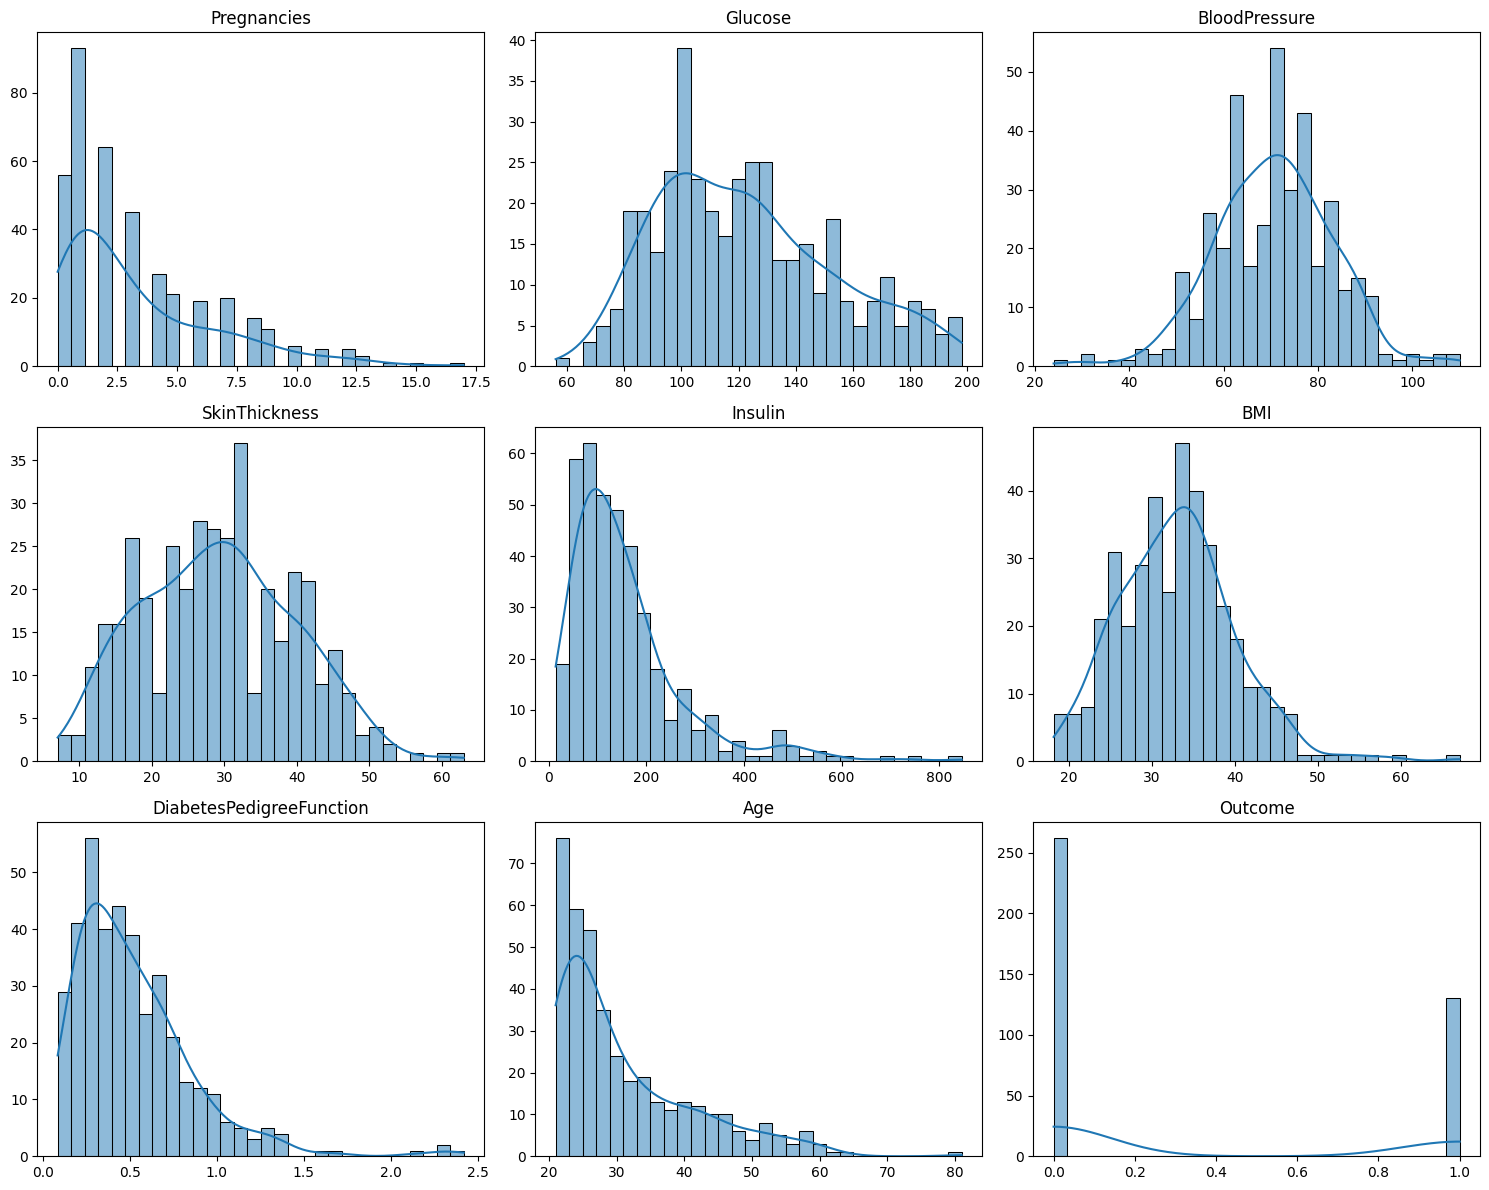

In [ ]:
# Gráficos de frequencia em colunas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3  # quantidade de colunas
n_rows = (len(colunas_numericas) + n_cols - 1) // n_cols  # total de linhas

# cria a figura para receber gráficos
plt.figure(figsize=(15, 4 * n_rows))

# Laço para criar um subplot para cada variável
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[coluna], kde=True, bins=30)
    plt.title(f'{coluna}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


Com esses gráficos de frequência, podemos observar:


*   Pregnancies:

    Podemos observar alguns outlier bem altos, em casos com até mais de 17 gestações

    Distribuição assimétrica à direita

    Grande maioria entre 0 e 2.5


*   Glucose:

    Distribuição próxima da normal, mas não perfeita

    Frequências bem distribuidas, com o pico próximo de 100

*   BloodPressure:

    Distribuição normal quase perfeita

*   SkinThickness:

    Distribuição assimétrica levemente à esquerda

*   Insulin:

    Distribuição assimétrica altamente à direita

*   BMI:

    Podemos observar uma tendencia ao sobrepeso nos registros. (Maiores que 30 de BMI)

    Distribuição assimétrica à direita


*   DiabetesPedigreeFunction:

    Distribuição assimétrica à direita

*   Age:

    Distribuição assimétrica à direita

*   Outcome:

    Podemos identificar um desbalanceamento entre as classes Target, para explorar isso mais a fundo vamos calcular as proporções.

In [ ]:
# Contagens de Outcome (Diabéticos/Não-Diabéticos)
counts = df['Outcome'].value_counts().sort_index()
total = counts.sum()
proportions = counts / total
print(proportions)

Outcome
0    0.668367
1    0.331633
Name: count, dtype: float64


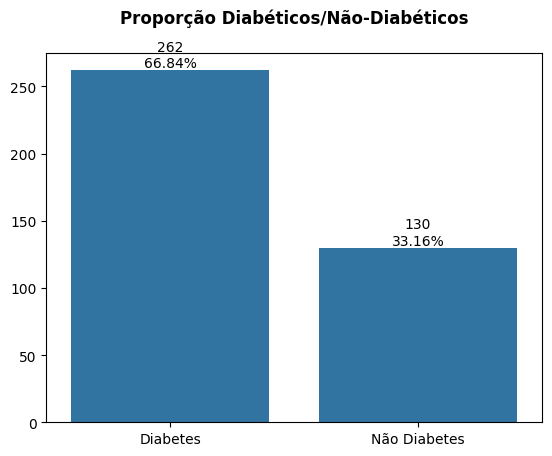

In [ ]:
# Gráfico da proporção de Diabéticos/Não-Diabéticos
ax = sns.barplot(x=['Diabetes','Não Diabetes'],y=counts.values)
ax.set_title("Proporção Diabéticos/Não-Diabéticos\n", fontsize=12, weight='bold')

for i, (count, porcentagem) in enumerate(zip (counts, proportions * 100)):
  ax.text( i, count, f'{count:,}\n{porcentagem:.2f}%', ha= 'center', va= 'bottom')
plt.show()

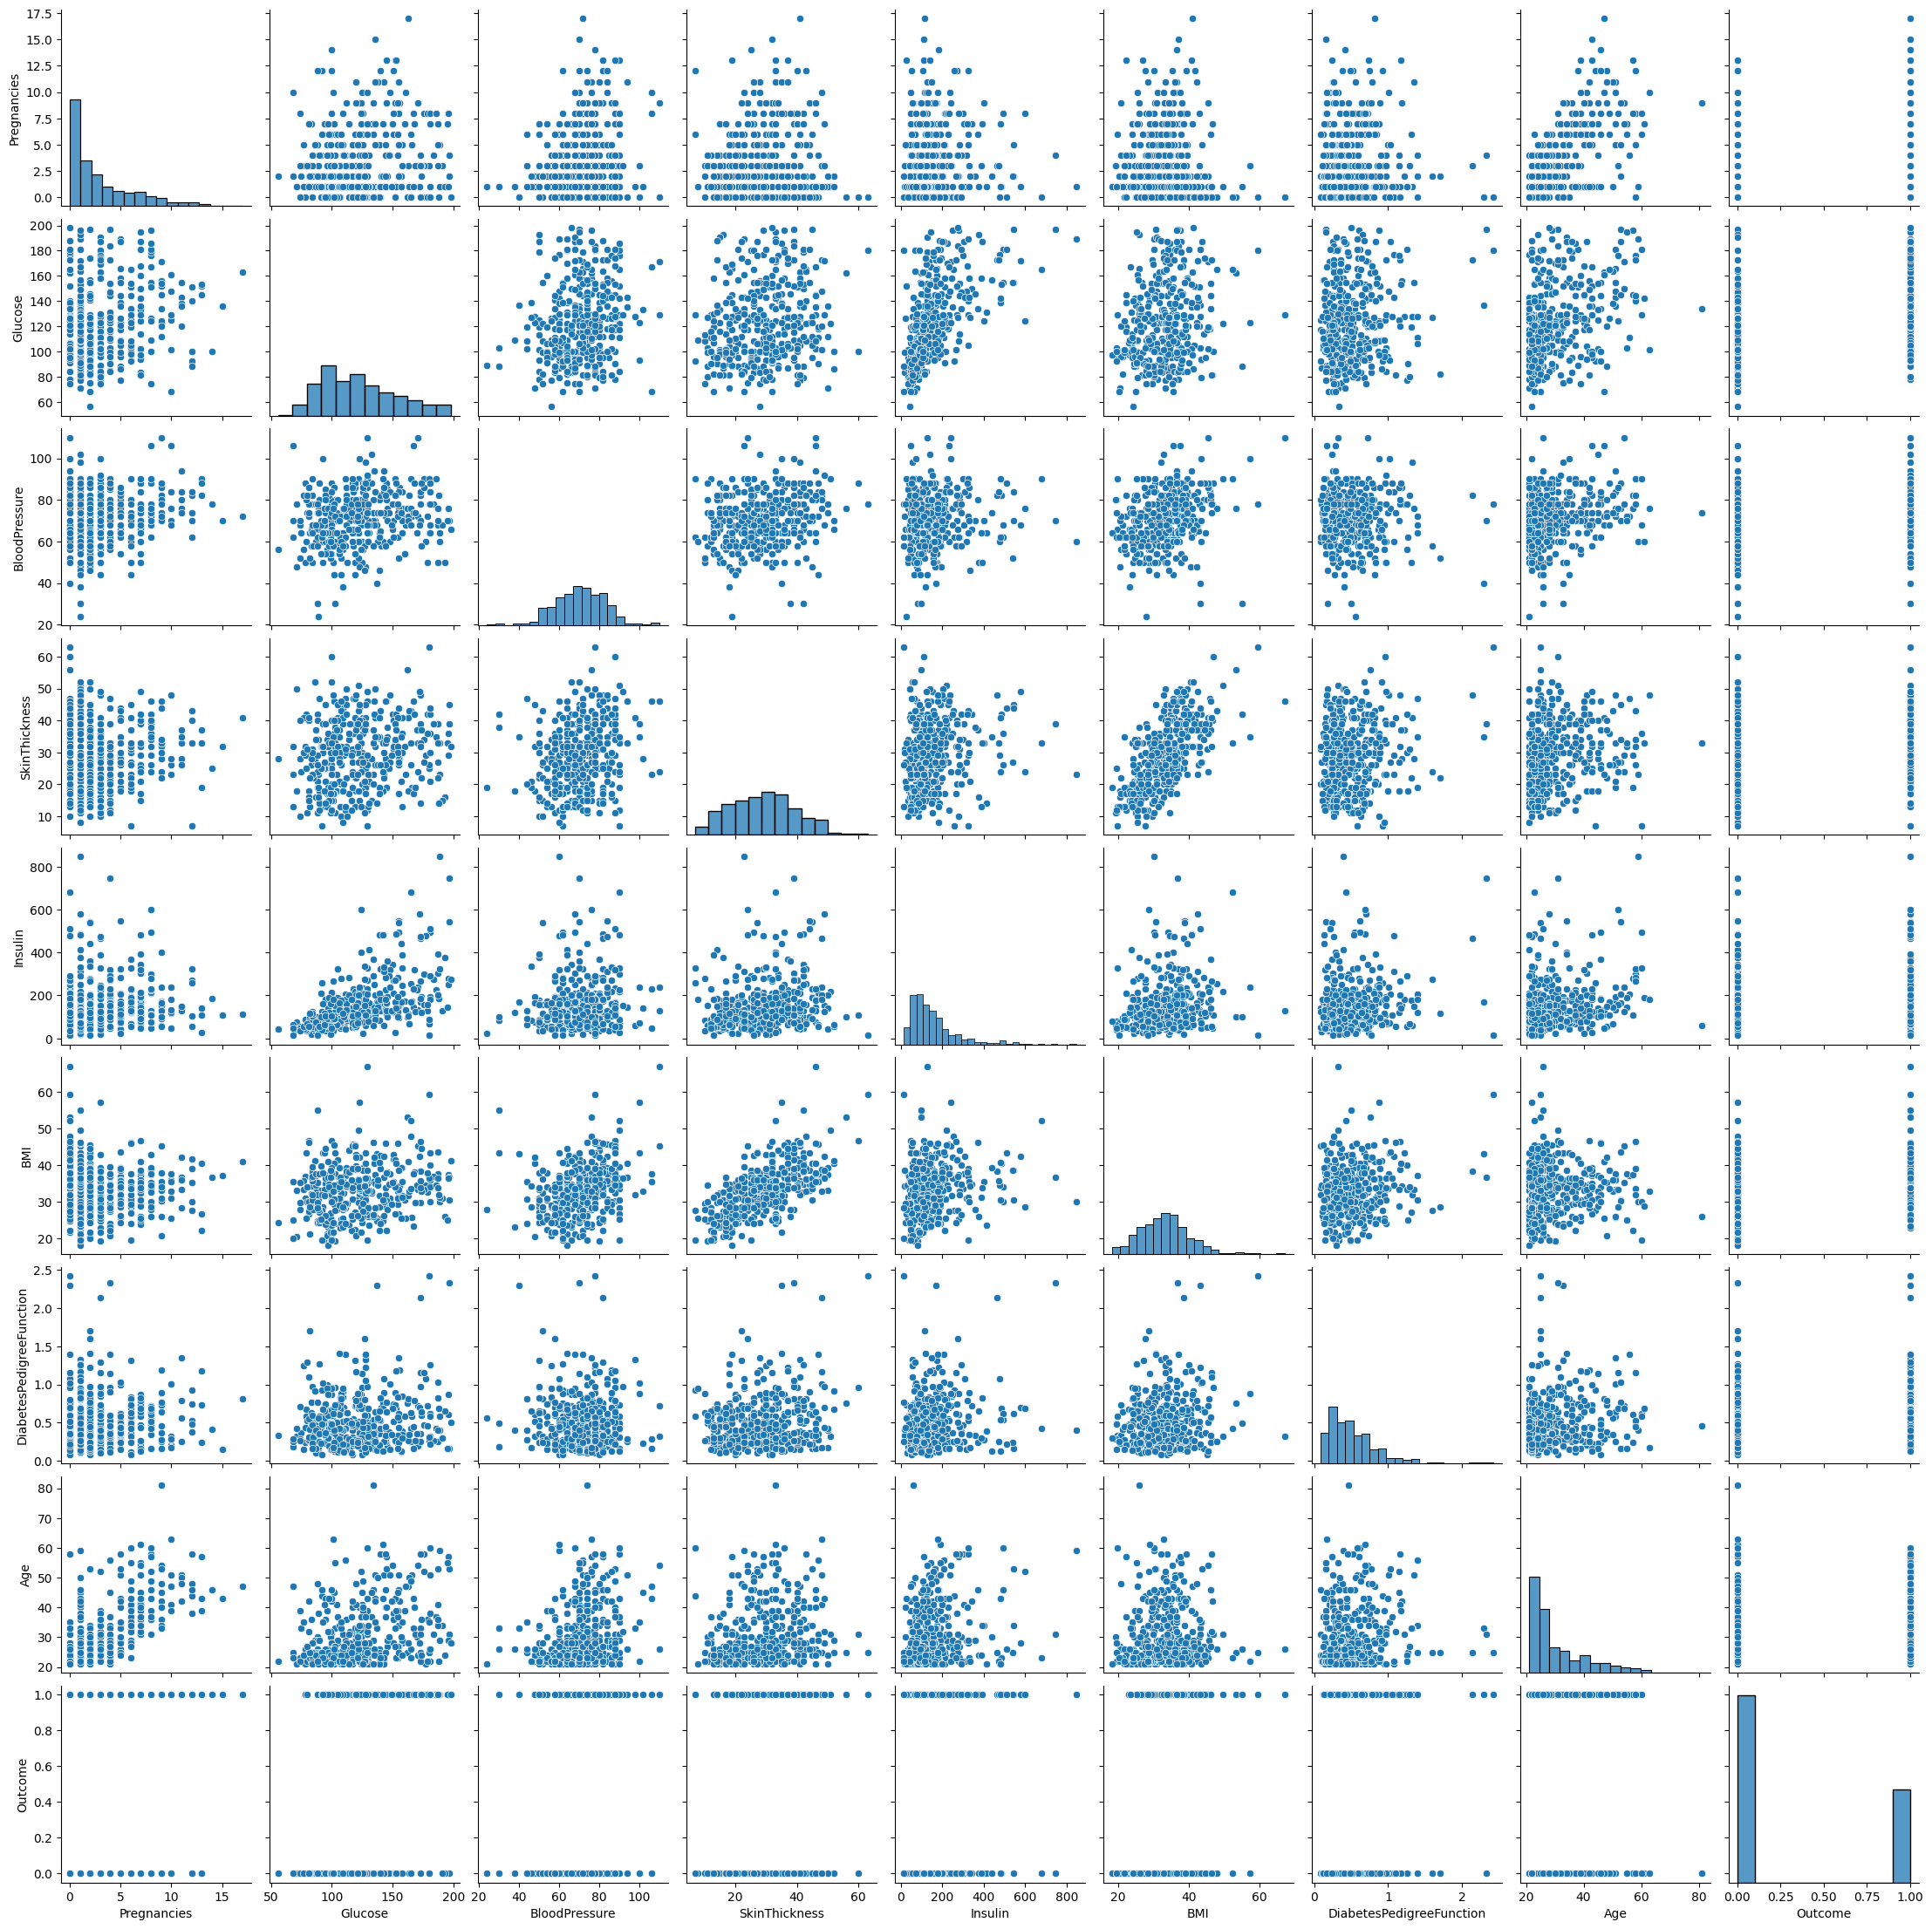

In [ ]:
# Gráfico de relação entre as colunas
sns.pairplot(df)

O pairplot nos mostra o relacionamento entre cada uma das colunas do dataset. Dentre esses relacionamentos, observamos que existem casos nos quais a relação pode ser encaixada mais facilmente em uma regressão linear.

Exemplos disso seriam a tabela "BMI x SkinThickNess" ou a "Insulin x Glucose". Ao nosso entendimento, podemos inferir que esses casos possuem uma maior correlação.

<Axes: >

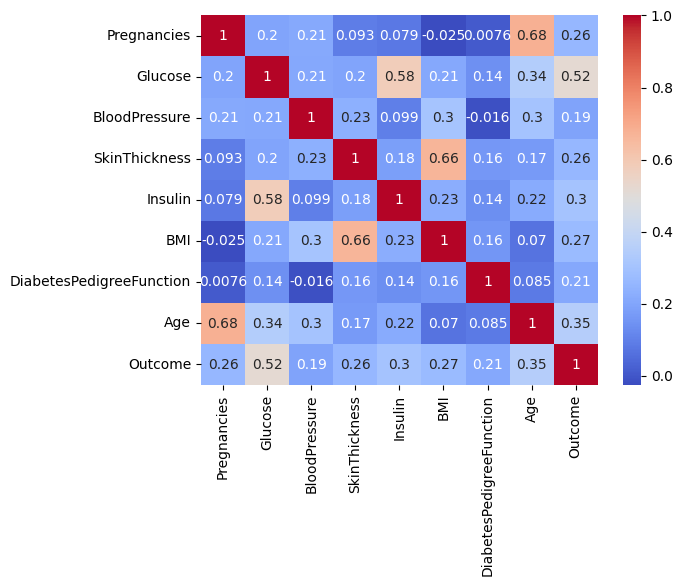

In [ ]:
# Correlação de todas colunas
correlacao = df.corr()

sns.heatmap(correlacao, annot=True, cmap="coolwarm")

Analizando o heatmap, podemos confirmar a nossa hipótese de que as colunas que observamos no pairplot de fato indicam uma correlação.

É possível compreender que as colunas Glicose (0,52), Idade (0,35) e Insulina (0,3) são fortemente correlacionadas com nossa coluna Target.

Além disso, observamos que existem fortes correlações entre o BMI e SkinThickness e entre Insulin e Glucose, o que está de acordo com o esperado dessas propriedades.

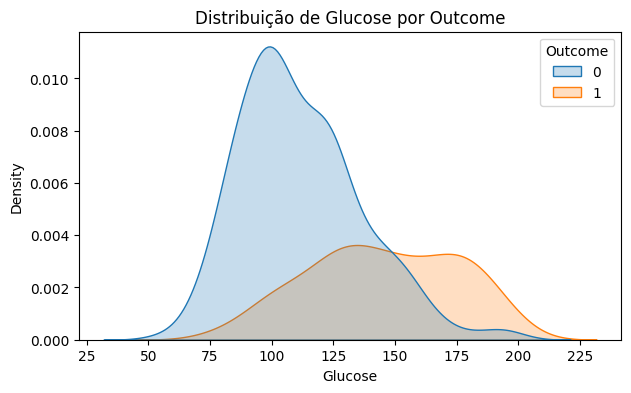

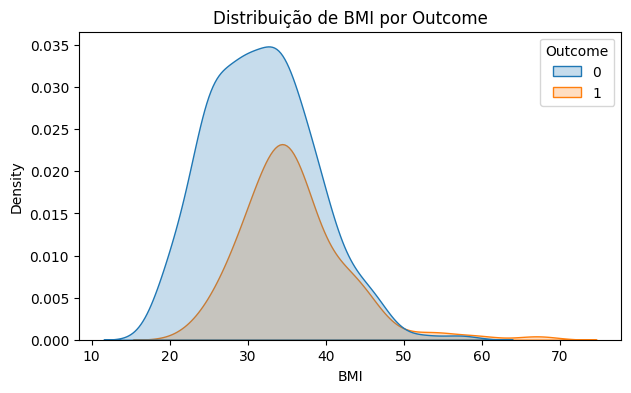

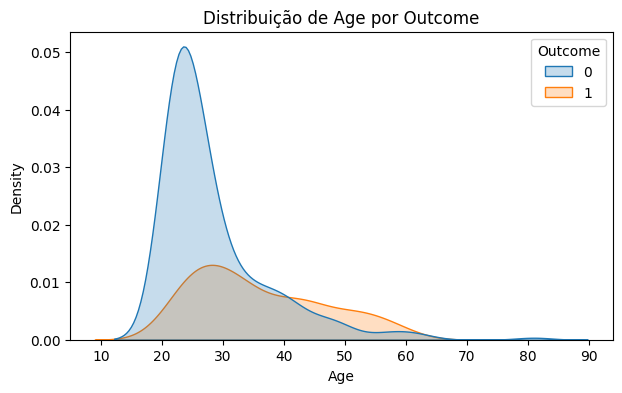

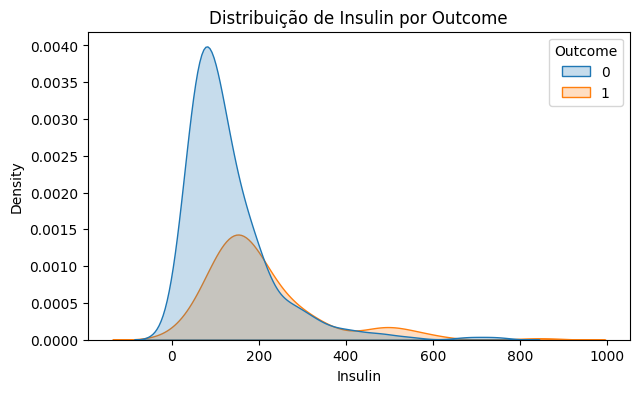

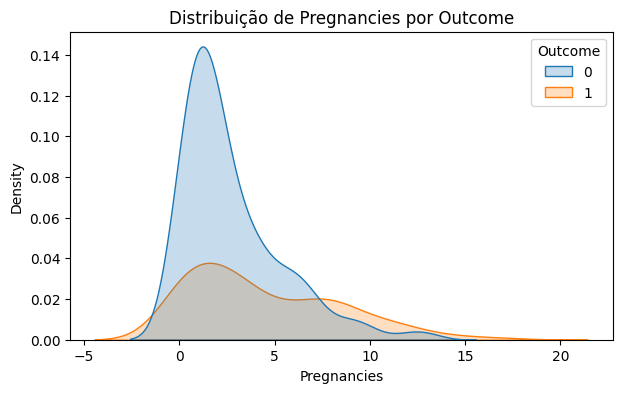

In [ ]:
features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Pregnancies']
for feature in features:
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=feature, hue='Outcome', fill=True)
    plt.title(f'Distribuição de {feature} por Outcome')
    plt.show()


Nesses gráficos de frequência, fizemos a divisão dos valores agrupados por valor da coluna Outcome.

Podemos verificar por exemplo no gráfico de Glucose que os registros com Outcome 0 estão concentrados mais à esquerda e os de Outcome 1 mais à direita. Isso indica que conforme o valor vai aumentando, existe uma tendência ao Outcome se tornar 1, apesar de não representar causalidade.

Além disso podemos identificar que Pregnancies, Insulin e Age tem curvas assimétricas à direita e uma concentração maior de Outcomes 1 conforme os valores aumentam, o que indica que todas tem tendencia à aumentar o risco de diabetes conforme mais velhas, mais gestações e mais insulina no sangue tem, apesar de ser menos gritante que o gráfico de Glucose.

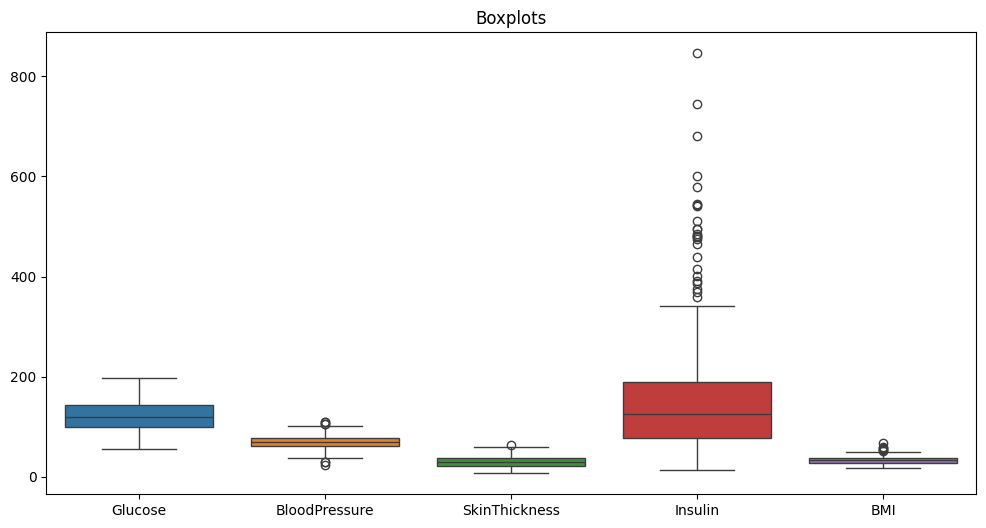

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
plt.title("Boxplots")
plt.show()


Como sabemos, a leitura do boxsplot funciona da seguinte maneira:
- Linha inferior representa o valor mínimo
- A linha superior representa o valor máximo
- A linha do meio representa o valor mediano.
- Aa linhas abaixo e acima do valor mediano, que formam uma caixa, representam os quartis de 25% e 75% respectivamente.
- Os círculos representam os outliers.

Com isso observamos que a variável Insulin apresenta uma quantidade considerável de outliers acima do maior valor, em uma faixa entre 400 até 846.

Também podemos observar que a variável Insulin tem uma caixa relativamente maior que os demais, ou seja, os dados tem maior dispersão.
O contrário pode ser observado no BMI, onde os dados são mais concentrados.


# 3. Modelagem


In [ ]:
# Separando Features e Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Divisão em treino e teste (70%/30%), com stratify pois a proporção de Outcomes é desequilibrada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

Para manipulações futuras, separamos a variável Target das demais.

Além disso, fizemos a divisão do dataset entre dados para treino e teste em uma proporção de 70/30, pois além de ser uma das proporções mais utilizadas, acreditamos que dessa forma os dados de treino mantem uma quantidade boa ao mesmo tempo que não perdemos tanto para os testes.

Também é importante notar que utilizamos do método stratify, devido ao desbalanceamento do dataset, para que essa proporção se mantenha após a divisão.

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Como método de normalização, escolhemos o StandardScaler. Ele padroniza os dados para cada feature ter média 0 e desvio padrão 1, o que garante que ele seja menos sensível a outliers do que o MinMaxScaler, onde um valor extremo mudaria toda a escala.

Além disso, sem essa padronização uma feature como Insulin, que vai até 800 teria muito mais dominância que o BMI que vai até 67, tornando algoritmos de distância como KNN e SVM menos eficientes. Com a padronização, todas as features contribuem de forma equilibrada na distância.

In [ ]:
# Optamos por escolher os modelos a partir de seu desempenho. Para isso, vamos rodar os 5 e comparar os resultados.
modelos = {
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=4),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}


Como nosso modelo não terá um grande processamento de dados, optamos por treinálo com cinco modelos diferentes para comparar os resultados entre eles.

Então, temos o modelo de regressão logística que trata de uma relação binária, no nosso caso, se tem ou não diabetes. Com ela, teremos um cálculo usando a função sigmóide, que resultará em uma probabilidade de classe (0 ou 1).
Ela nos mostra uma relação direta entre as classes, por exemplo como a glicose influência a probabilidade de diabetes.

Já o random forest, é uma série de árvores de decisão, onde cada árvore é treinada com subconjuntos aleatórios de dados e variáveis. A decisão final aplicada, é basicamente a média do resultado de cada uma das árvores.
Acreditamos ser um modelo importante, pois com ela, poderemos capturar correlações não lineares entre os dados, como entre glicose, imc e idade por exemplo.

O XGBClassifier, é baseado em um aprendizado sequencial, diferente do random forest, ele treina cada uma das árvores, onde, sempre a próxima tenta corrigir os erros da anterior.
Optamos por usá-lo, pois esse processo faz com que o modelo se ajuste progressivamente, assim teremos uma alta capacidade preditiva.


O KNN é  um método baseado em distâncias e não em parâmetros.
Para classificar um novo dado, ele busca os vizinhos mais próximos (No nosso exemplo passamos 4) no conjunto de treinamento e classifica com base na maioria das classes desses vizinhos.
Optamos usá-lo por ser simples, não assume formas específicas para as fronteiras entre classes.
Como os dados foram padronizados, consideramos usá-lo sem a  preocupação de termos comparações muito discrepantes.


E o SVM, assim como o KNN, é um algoritmo de classificação supervisionado.
O SVM cria um hiperplano que separa as classes com máxima margem.
Ou seja, ele buscará entre os vetores, uma reta ideal no espaçamento entre as margens.
O modelo é muito eficiente nas relações não lineares,o que é bastante útil no nosso caso, já que os padrões nem sempre são diretos ou evidentes.


#4. Treinamento do modelo e 5. Avaliação do modelo

In [ ]:
resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    resultados[nome] = {
        'Acurácia': acc,
        'ROC AUC': roc,
        'Precisão': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score']
    }

Após treinarmos os modelos com a function .fit, utilizamos a function predict na parte do dataset separada para testes, que retorna o valor de Target mais provavel segundo a predição do modelo, bem como o predict_proba que retorna a probabilidade de cada classe individualmente.

Com isso, utilizaremos os resultados dessas predições para tirarmos métricas de desempenho.



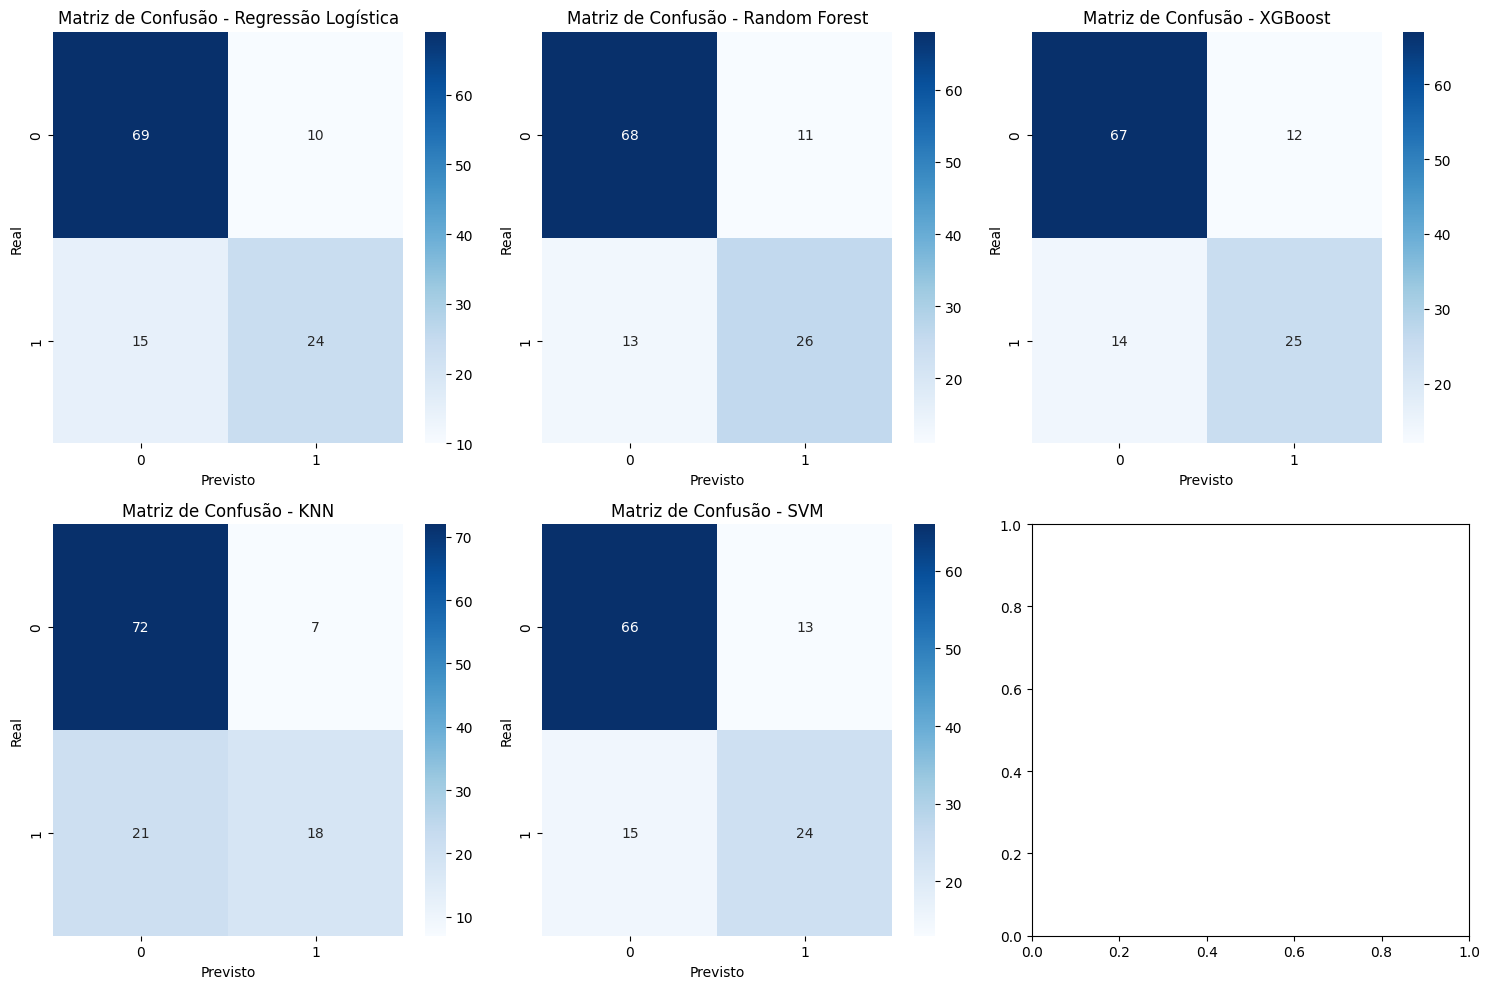

In [ ]:
# Matriz de confusão
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (nome, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Matriz de Confusão - {nome}")
    ax.set_xlabel("Previsto")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

As principais métricas de avaliação de desempenho de modelos (Accuracy, Precision, Recall e F1-Score) são obtidas com base na matriz de confusão.

Essa matriz é um gráfico em que podemos observar a relação entre o previsto e o real valor dos dados de teste. Nela podemos observar os Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos para cada modelo.

A partir dela podemos então retirar as métricas, sendo elas:
- Accuracy - previsões corretas / total de previsões
- Precision - previsões corretas / todas as previsões positivas
- Recall - verdadeiros positivos / positivos reais (VP + FN)
- F1-Score - media harmônica entre precisão e recall

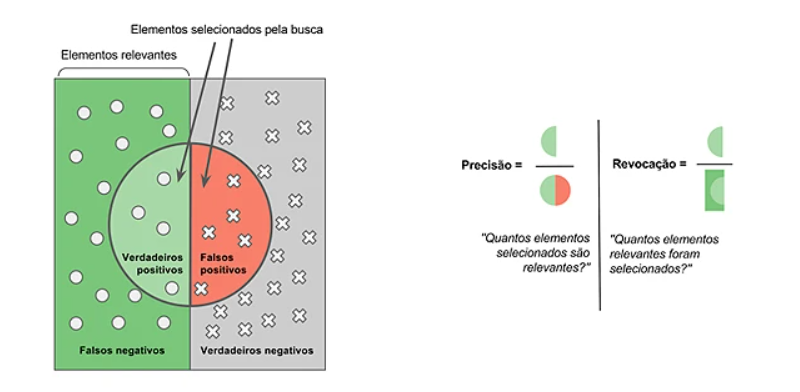

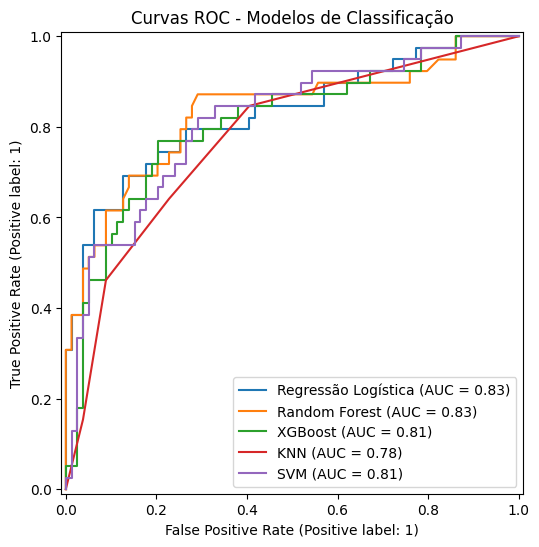

In [ ]:
# CURVAS ROC
plt.figure(figsize=(8,6))
for nome, modelo in modelos.items():
    RocCurveDisplay.from_estimator(modelo, X_test_scaled, y_test, ax=plt.gca(), name=nome)
plt.title("Curvas ROC - Modelos de Classificação")
plt.show()

# AUC >0.5 : pouco poder preditivo
# AUC <=1 : overfitting

In [ ]:
# Validação Cruzada de ROC AUC
print("VALIDAÇÃO CRUZADA (ROC AUC - 5 splits)")
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for nome, modelo in modelos.items():
    cv_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')
    print(f"{nome}: Média ROC AUC = {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

VALIDAÇÃO CRUZADA (ROC AUC - 5 splits)
Regressão Logística: Média ROC AUC = 0.8431 ± 0.0417
Random Forest: Média ROC AUC = 0.8391 ± 0.0612
XGBoost: Média ROC AUC = 0.8271 ± 0.0671
KNN: Média ROC AUC = 0.7443 ± 0.0519
SVM: Média ROC AUC = 0.8154 ± 0.0573


Para avaliar de forma mais confiável o desempenho dos modelos, utilizamos a validação cruzada com 5 divisões.
Esse processo divide o conjunto de treino em cinco partes, onde cada uma delas mantém a proporção original entre as classes, ou seja, diabéticos e não diabéticos.

Depois, o modelo é treinado em quatro partes e validado na quinta, repetindo o processo até que todas as divisões tenham sido usadas como teste.

Por fim, calculamos a média e o desvio padrão das pontuações de desempenho.
O método de avaliação escolhido foi o ROC AUC, que mede a capacidade do modelo em distinguir entre as classes.

Podemos observar nos resultados que o modelo de Regressão Logística apresentou o melhor desempenho médio na métrica ROC AUC, e o Random Forest e SVM tiveram um resultado bem parecido.

O XGBClassifier, apesar de ter um resultado um pouco abaixo, manteve uma boa performance.

Já o KNN teve o pior resultado, o que já era esperado por ser um método mais apropriado para comparações de escala dos dados.


                     Acurácia   ROC AUC  Precisão    Recall  F1-score
Random Forest        0.796610  0.831386  0.702703  0.666667  0.684211
Regressão Logística  0.788136  0.828302  0.705882  0.615385  0.657534
SVM                  0.762712  0.813697  0.648649  0.615385  0.631579
XGBoost              0.779661  0.808504  0.675676  0.641026  0.657895
KNN                  0.762712  0.776209  0.720000  0.461538  0.562500


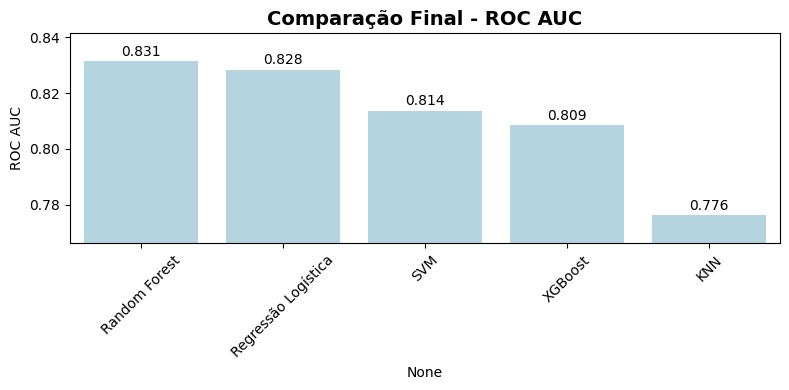

In [ ]:
# Conclusão

df_resultados = pd.DataFrame(resultados).T.sort_values(by='ROC AUC', ascending=False)
print(df_resultados)

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df_resultados.index, y='ROC AUC', data=df_resultados, color='lightblue')
plt.title("Comparação Final - ROC AUC", fontsize=14, weight='bold')
plt.xticks(rotation=45)

# recorta a range de amostragem para melhor visualizacao
plt.ylim(df_resultados['ROC AUC'].min() - 0.01, df_resultados['ROC AUC'].max() + 0.01)

# label com os valores
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # posição x no centro da barra
        y=height + 0.002,                 # posição y ligeiramente acima da barra
        s=f'{height:.3f}',                # valor com 3 casas decimais
        ha='center',                       # centralizar horizontalmente
        fontsize=10
    )

plt.tight_layout()
plt.show()

# Conclusão

Tivemos resultados expressivos em nosso modelo supervisionado utilizando o diabetes dataset.
Nós identificamos e removemos valores zerados em determinadas colunas durante o processo de exploração dos dados, o que garantiu uma boa confiabilidade nos dados.

A análise exploratória evidenciou relações relevantes entre as variáveis e o desfecho da variável target.
Podemos ver que níveis mais altos de glicose e IMC estão associados a uma maior probabilidade de diagnóstico positivo para diabetes.

Na etapa de modelagem, foram aplicados e comparados cinco algoritmos supervisionados.
Que permitiram uma avaliação ampla da performance dos modelos.

O modelo de Random forest apresentou um melhor desempenho médio na métrica ROC AUC.

De forma geral, o estudo demonstrou que, mesmo com um conjunto de dados relativamente pequeno e simples, é possível atingir resultados consistentes.
E embora o modelo não substitua o diagnóstico médico, ele evidencia o potencial das técnicas de machine learning como ferramentas auxiliares de apoio, capazes de contribuir com análises preliminares e triagens em cenários reais.
